In [1]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

print(pd.__version__)

# Load Data
dataset = load_dataset('lukebarousse/data_jobs')

# Convert dataset to pandas DataFrame
df = dataset['train'].to_pandas()

# Data Clean Up
# Change string to datetime ('job_posted_date' column)
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# Convert 'job_skills' string list to a python list
import ast
df['job_skills'] = df['job_skills'].apply(lambda string_list: ast.literal_eval(string_list) if pd.notna(string_list) else string_list)


2.2.3


In [2]:
df_exploded = df.explode('job_skills').copy()

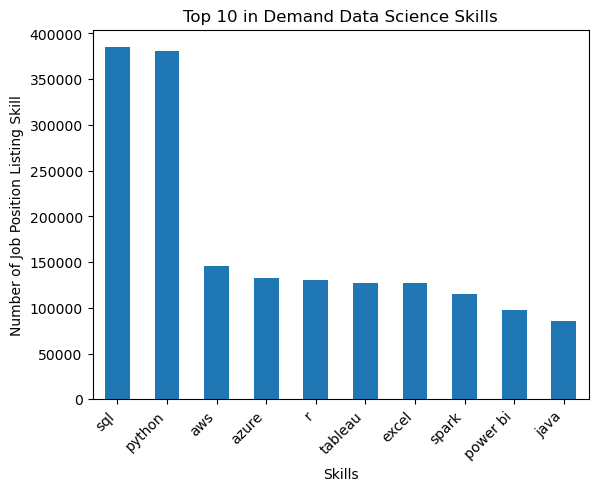

In [3]:
df_exploded['job_skills'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 in Demand Data Science Skills')
plt.xlabel('Skills')
plt.ylabel('Number of Job Position Listing Skill')
plt.xticks(rotation=45, ha='right')
plt.show()

In [32]:
skills_count = df_exploded.groupby([ 'job_skills', 'job_title_short']).size()
skills_count

job_skills  job_title_short          
airflow     Business Analyst               318
            Cloud Engineer                 260
            Data Analyst                  2002
            Data Engineer                25505
            Data Scientist                3915
                                         ...  
zoom        Machine Learning Engineer       46
            Senior Data Analyst             86
            Senior Data Engineer           122
            Senior Data Scientist           79
            Software Engineer              229
Length: 2256, dtype: int64

In [33]:
df_skills_count = skills_count.reset_index(name='skill_count')

In [34]:
df_skills_count.head()

,job_skills,job_title_short,skill_count
0,airflow,Business Analyst,318
1,airflow,Cloud Engineer,260
2,airflow,Data Analyst,2002
3,airflow,Data Engineer,25505
4,airflow,Data Scientist,3915


In [37]:
df_skills_count.sort_values(by='skill_count', ascending=False)

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
293,codecommit,Business Analyst,1
2233,xamarin,Machine Learning Engineer,1
1087,mlr,Machine Learning Engineer,1


In [59]:
job_title = 'Data Engineer'
top_skills = 15
df_skills_job = df_skills_count[df_skills_count['job_title_short'] == job_title]
df_skills_job.head()

,job_skills,job_title_short,skill_count
3,airflow,Data Engineer,25505
13,airtable,Data Engineer,68
23,alteryx,Data Engineer,2294
33,angular,Data Engineer,1446
42,angular.js,Data Engineer,45


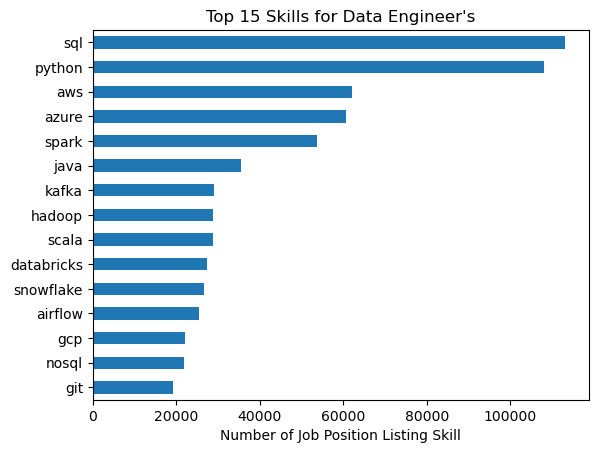

In [65]:
df_skills_job.sort_values(by='skill_count', ascending=False).head(top_skills).set_index('job_skills').plot(kind='barh')
plt.gca().invert_yaxis()
plt.title(f"Top {top_skills} Skills for {job_title}'s")
plt.xlabel('Number of Job Position Listing Skill')
plt.ylabel('')
plt.legend().set_visible(False)
plt.show()